## PANDAS 2

In [1]:
import numpy as np
import pandas as pd

In [2]:
revenues = pd.Series([555,7000,1980])

In [3]:
revenues

0     555
1    7000
2    1980
dtype: int64

In [4]:
city_revenues = pd.Series([555,7000,1980],index=['Amsterdam','Tokyo','Beijing'])
city_revenues

Amsterdam     555
Tokyo        7000
Beijing      1980
dtype: int64

In [5]:
city_revenues2 = pd.Series([555,7000,1980,555,666,777],index=['Amsterdam','Tokyo','Beijing','Berlin','Moscow','Rio'])
city_revenues2

Amsterdam     555
Tokyo        7000
Beijing      1980
Berlin        555
Moscow        666
Rio           777
dtype: int64

In [6]:
city_employee_count = pd.Series({'Amsterdam':5,'Tokyo':8})
city_employee_count

Amsterdam    5
Tokyo        8
dtype: int64

In [7]:
city_data = pd.DataFrame({'revenue':city_revenues,'employee_count':city_employee_count})
city_data

,revenue,employee_count
Amsterdam,555,5.0
Beijing,1980,NaN
Tokyo,7000,8.0


In [8]:
city_data.columns

Index(['revenue', 'employee_count'], dtype='object')

In [9]:
city_data.index

Index(['Amsterdam', 'Beijing', 'Tokyo'], dtype='object')

In [10]:
further_city_data = pd.DataFrame({'revenue':[7000,3400],'employee_count':[2,2]},index=['New York','Barcelona'])
further_city_data

,revenue,employee_count
New York,7000,2
Barcelona,3400,2


In [11]:
all_city_data = pd.concat([city_data,further_city_data])
all_city_data

,revenue,employee_count
Amsterdam,555,5.0
Beijing,1980,NaN
Tokyo,7000,8.0
New York,7000,2.0
Barcelona,3400,2.0


## CONCAT HORIZONTAL

In [12]:
city_countries = pd.DataFrame({'country':['Holland','Japan','Holland','Canada','Spain'],
                              'capital':[1,1,0,0,0]},
                             index=['Amsterdam','Tokyo','Rotterdam','Toronto','Barcelona'])


In [13]:
city_countries

,country,capital
Amsterdam,Holland,1
Tokyo,Japan,1
Rotterdam,Holland,0
Toronto,Canada,0
Barcelona,Spain,0


In [14]:
cities = pd.concat([all_city_data, city_countries], axis = 1)
cities

,revenue,employee_count,country,capital
Amsterdam,555.0,5.0,Holland,1.0
Beijing,1980.0,NaN,NaN,NaN
Tokyo,7000.0,8.0,Japan,1.0
New York,7000.0,2.0,NaN,NaN
Barcelona,3400.0,2.0,Spain,0.0
Rotterdam,NaN,NaN,Holland,0.0
Toronto,NaN,NaN,Canada,0.0


In [15]:
countries

NameError: name 'countries' is not defined

## CONCAT VERTICAL

In [16]:
all_city_countries = pd.concat([all_city_data, city_countries], axis = 1, join = 'inner')
all_city_countries

## join = 'inner' berfungsi untuk menampilkan data yang ada aja

,revenue,employee_count,country,capital
Amsterdam,555,5.0,Holland,1
Tokyo,7000,8.0,Japan,1
Barcelona,3400,2.0,Spain,0


## MERGE

In [17]:
countries = pd.DataFrame({'population_mil':[17,127,37],
                         'continent':["Europe",'Asia','North America']},index=['Holland','Japan','Canada'])

In [18]:
countries

,population_mil,continent
Holland,17,Europe
Japan,127,Asia
Canada,37,North America


In [19]:
countries2 = pd.DataFrame({'population_mil':[17,127,37],
                         'continent':["Europe",'Asia','North America'],
                          'country':['Holland','Japan','Canada']})
countries2

,population_mil,continent,country
0,17,Europe,Holland
1,127,Asia,Japan
2,37,North America,Canada


In [20]:
cities

,revenue,employee_count,country,capital
Amsterdam,555.0,5.0,Holland,1.0
Beijing,1980.0,NaN,NaN,NaN
Tokyo,7000.0,8.0,Japan,1.0
New York,7000.0,2.0,NaN,NaN
Barcelona,3400.0,2.0,Spain,0.0
Rotterdam,NaN,NaN,Holland,0.0
Toronto,NaN,NaN,Canada,0.0


In [21]:
cities.merge(countries2, on='country', how = 'inner')

,revenue,employee_count,country,capital,population_mil,continent
0,555.0,5.0,Holland,1.0,17,Europe
1,NaN,NaN,Holland,0.0,17,Europe
2,7000.0,8.0,Japan,1.0,127,Asia
3,NaN,NaN,Canada,0.0,37,North America


In [22]:
cities.merge(countries2, on='country', how= 'left')

,revenue,employee_count,country,capital,population_mil,continent
0,555.0,5.0,Holland,1.0,17.0,Europe
1,1980.0,NaN,NaN,NaN,NaN,NaN
2,7000.0,8.0,Japan,1.0,127.0,Asia
3,7000.0,2.0,NaN,NaN,NaN,NaN
4,3400.0,2.0,Spain,0.0,NaN,NaN
5,NaN,NaN,Holland,0.0,17.0,Europe
6,NaN,NaN,Canada,0.0,37.0,North America


In [23]:
cities.merge(countries2, on='country', how= 'right')

,revenue,employee_count,country,capital,population_mil,continent
0,555.0,5.0,Holland,1.0,17,Europe
1,NaN,NaN,Holland,0.0,17,Europe
2,7000.0,8.0,Japan,1.0,127,Asia
3,NaN,NaN,Canada,0.0,37,North America


In [24]:
cities.merge(countries2, on='country', how= 'outer')
# Outer ambil semua pokoknya digabung semua 

,revenue,employee_count,country,capital,population_mil,continent
0,555.0,5.0,Holland,1.0,17.0,Europe
1,NaN,NaN,Holland,0.0,17.0,Europe
2,1980.0,NaN,NaN,NaN,NaN,NaN
3,7000.0,2.0,NaN,NaN,NaN,NaN
4,7000.0,8.0,Japan,1.0,127.0,Asia
5,3400.0,2.0,Spain,0.0,NaN,NaN
6,NaN,NaN,Canada,0.0,37.0,North America


## Data Cleansing With PANDAS

In [25]:
df = pd.read_csv('property_data.csv')
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PID           8 non-null      float64
 1   ST_NUM        7 non-null      float64
 2   ST_NAME       9 non-null      object 
 3   OWN_OCCUPIED  8 non-null      object 
 4   NUM_BEDROOMS  7 non-null      object 
 5   NUM_BATH      8 non-null      object 
 6   SQ_FT         8 non-null      object 
dtypes: float64(2), object(5)
memory usage: 632.0+ bytes


In [27]:
df.isna().sum()

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    1
NUM_BEDROOMS    2
NUM_BATH        1
SQ_FT           1
dtype: int64

In [28]:
df['ST_NUM']

0    104.0
1    197.0
2      NaN
3    201.0
4    203.0
5    207.0
6      NaN
7    213.0
8    215.0
Name: ST_NUM, dtype: float64

In [29]:
df['ST_NUM'].isnull()

0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
8    False
Name: ST_NUM, dtype: bool

In [30]:
df['ST_NUM'].fillna(0)
## fillna digunakan untuk mengisi data menjadi sebuah nilai

0    104.0
1    197.0
2      0.0
3    201.0
4    203.0
5    207.0
6      0.0
7    213.0
8    215.0
Name: ST_NUM, dtype: float64

In [31]:
print("Hello darkness my oldfriend")

Hello darkness my oldfriend


In [32]:
df.NUM_BEDROOMS

0      3
1      3
2    NaN
3      1
4      3
5    NaN
6      2
7     --
8     na
Name: NUM_BEDROOMS, dtype: object

In [33]:
df.NUM_BEDROOMS.isnull

<bound method Series.isnull of 0      3
1      3
2    NaN
3      1
4      3
5    NaN
6      2
7     --
8     na
Name: NUM_BEDROOMS, dtype: object>

In [34]:
df['OWN_OCCUPIED']

0      Y
1      N
2      N
3     12
4      Y
5      Y
6    NaN
7      Y
8      Y
Name: OWN_OCCUPIED, dtype: object

In [35]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [36]:
ex = 0
for row in df['NUM_BATH']:
    try:
        str(row)
        df.loc[ex, 'NUM_BATH'] = np.nan
    except Value Error:
        pass
    ex 

SyntaxError: invalid syntax (3494693025.py, line 6)

In [37]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [38]:
df3= pd.read_csv('property_data.csv')
df3

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [39]:
df3


,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [40]:
df3['NUM_BATH'].info

<bound method Series.info of 0         1
1       1.5
2         1
3       NaN
4         2
5         1
6    HURLEY
7         1
8         2
Name: NUM_BATH, dtype: object>

In [41]:
cnt = 0
for row in df['OWN_OCCUPIED']:
    try:
        int(row)
        df.loc[cnt,'OWN_OCCUPIED']= np.nan
    except ValueError:
        pass
    cnt+=1
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,NaN,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [42]:
df4 = pd.read_csv('property_data.csv')
df4

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [43]:
cnt = 0
for row in df4['NUM_BATH']:
    try:
        float(row)    
    except :
        if row == 'HURLEY':
            df.loc[cnt,'NUM_BATH']= np.nan
    cnt+=1
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,NaN,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,NaN,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [44]:

for i,row in df7['NUM_BATH'].iteritems():
    try:
        float(row)
    except :
        if row == 'HURLEY':
            df7.at[i, 'NUM_BATH'] = np.nan

median = df7['NUM_BATH'].median()
df7['NUM_BATH'].fillna(median, inplace= True)

df7


NameError: name 'df7' is not defined

In [45]:
df7 = pd.read_csv('property_data.csv')

In [46]:
df7

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [47]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,NaN,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,NaN,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [48]:
import pandas as pd
import numpy as np
df = pd.read_csv('property_data.csv')

In [49]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [50]:
df.isnull()

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,True,False,False,True,False,False
3,False,False,False,False,False,True,False
4,True,False,False,False,False,False,False
5,False,False,False,False,True,False,False
6,False,True,False,True,False,False,False
7,False,False,False,False,False,False,True
8,False,False,False,False,False,False,False


In [51]:
df.isnull

<bound method DataFrame.isnull of            PID  ST_NUM     ST_NAME OWN_OCCUPIED NUM_BEDROOMS NUM_BATH SQ_FT
0  100001000.0   104.0      PUTNAM            Y            3        1  1000
1  100002000.0   197.0   LEXINGTON            N            3      1.5    --
2  100003000.0     NaN   LEXINGTON            N          NaN        1   850
3  100004000.0   201.0    BERKELEY           12            1      NaN   700
4          NaN   203.0    BERKELEY            Y            3        2  1600
5  100006000.0   207.0    BERKELEY            Y          NaN        1   800
6  100007000.0     NaN  WASHINGTON          NaN            2   HURLEY   950
7  100008000.0   213.0     TREMONT            Y           --        1   NaN
8  100009000.0   215.0     TREMONT            Y           na        2  1800>

In [52]:
df.isnull().sum()

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    1
NUM_BEDROOMS    2
NUM_BATH        1
SQ_FT           1
dtype: int64

In [53]:
df.isnull().values.any()

True

In [54]:
df.isnull().sum().sum()

8

In [55]:
df['ST_NUM']

0    104.0
1    197.0
2      NaN
3    201.0
4    203.0
5    207.0
6      NaN
7    213.0
8    215.0
Name: ST_NUM, dtype: float64

In [56]:
df['ST_NUM'].fillna(125, inplace = True)

In [57]:
df['ST_NUM']

0    104.0
1    197.0
2    125.0
3    201.0
4    203.0
5    207.0
6    125.0
7    213.0
8    215.0
Name: ST_NUM, dtype: float64

In [58]:
df.loc[2,'ST_NUM']

125.0

In [59]:
df.head(9)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,125.0,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,125.0,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


## ANALYZING OBESITY

In [60]:
import pandas as pd
%matplotlib inline
data = pd.ExcelFile('obes.xls')

In [61]:
data

In [62]:
data.sheet_names

['Chapter 7',
 '7.1',
 '7.2',
 '7.3',
 '7.4',
 '7.5',
 '7.6',
 '7.7',
 '7.8',
 '7.9',
 '7.10']

In [63]:
data_age = data.parse(u'7.2', skiprows = 4, skipfooter = 14)

In [64]:
data_age.head()

,Unnamed: 0,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0


In [65]:
data_age.dropna(inplace=True) ## inplace = True itu untuk membuat data menjadi permanen

In [66]:
data_age

,Unnamed: 0,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0
10,2011/12,11736.0,495.0,391.0,1484.0,3104.0,3581.0,2119.0,468.0,94.0


In [73]:
data_age.rename(columns={'Unnamed: 0' : 'Year/Month'}, inplace= True)

In [74]:
data_age

,Year/Month,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0
10,2011/12,11736.0,495.0,391.0,1484.0,3104.0,3581.0,2119.0,468.0,94.0


In [75]:
## SET INDEX

In [76]:
data_age.set_index('Year/Month', inplace = True)

In [77]:
data_age

,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
Year/Month,,,,,,,,,
2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


In [78]:
## RESET INDEX

In [79]:
data_age.reset_index()

,Year/Month,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
1,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
2,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
3,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
4,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
5,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
6,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
7,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
8,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0
9,2011/12,11736.0,495.0,391.0,1484.0,3104.0,3581.0,2119.0,468.0,94.0


In [80]:
data_age


,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
Year/Month,,,,,,,,,
2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


In [81]:
## PLOT

<AxesSubplot:xlabel='Year/Month'>

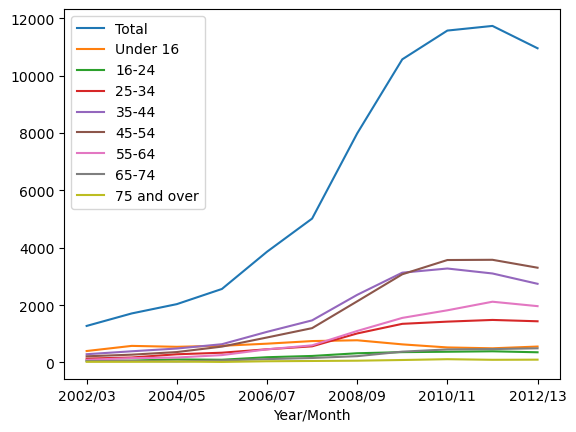

In [82]:
data_age.plot()

<AxesSubplot:xlabel='Year/Month'>

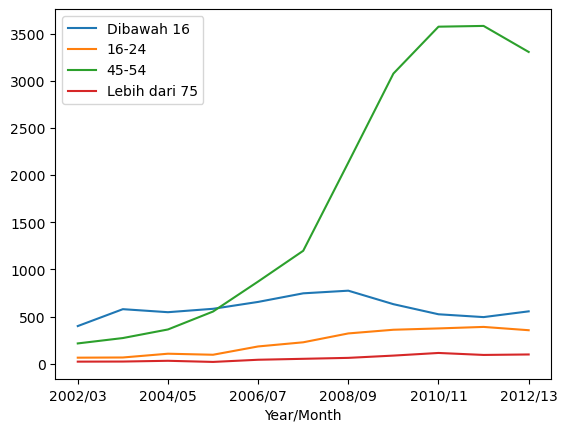

In [83]:
data_age['Under 16'].plot(label = 'Dibawah 16', legend = True)
data_age['16-24'].plot(label = '16-24', legend = True)
data_age['45-54'].plot(label = '45-54', legend = True)
data_age['75 and over'].plot(label = 'Lebih dari 75', legend = True)

In [ ]:
## bisa disimpulkan bahwa umut 45- 54 merupakan umur yang paling rawan obesitas dan terjadi angka kenaikan tiap tahun

In [84]:
## Menghapus 1 kolom lalu kasi plot

<AxesSubplot:xlabel='Year/Month'>

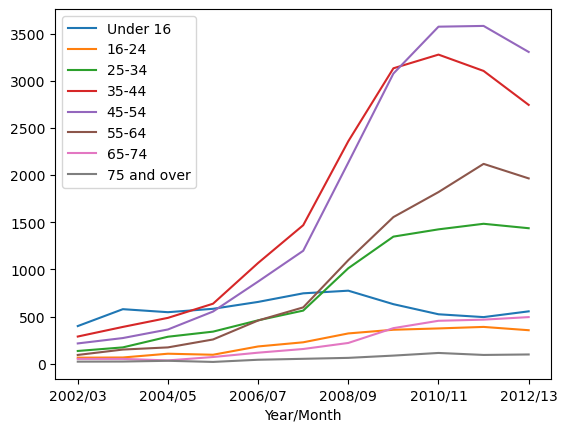

In [85]:
data_age.drop('Total', axis = 1).plot()

## Date Time atau Time Series

In [87]:
from datetime import datetime

In [88]:
date_range = pd.date_range(start='1/01/2020', end='1/08/2020', freq = 'H')

In [89]:
date_range

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-01-07 15:00:00', '2020-01-07 16:00:00',
               '2020-01-07 17:00:00', '2020-01-07 18:00:00',
               '2020-01-07 19:00:00', '2020-01-07 20:00:00',
               '2020-01-07 21:00:00', '2020-01-07 22:00:00',
               '2020-01-07 23:00:00', '2020-01-08 00:00:00'],
              dtype='datetime64[ns]', length=169, freq='H')

In [90]:
df = pd.DataFrame(date_range,columns=['date'])

In [91]:
df

,date
0,2020-01-01 00:00:00
1,2020-01-01 01:00:00
2,2020-01-01 02:00:00
3,2020-01-01 03:00:00
4,2020-01-01 04:00:00
...,...
164,2020-01-07 20:00:00
165,2020-01-07 21:00:00
166,2020-01-07 22:00:00
167,2020-01-07 23:00:00


In [92]:
import numpy as np
df['data']= np.random.randint(0,100,size=len(date_range) )

In [93]:
df.head()

,date,data
0,2020-01-01 00:00:00,93
1,2020-01-01 01:00:00,11
2,2020-01-01 02:00:00,10
3,2020-01-01 03:00:00,54
4,2020-01-01 04:00:00,92


In [94]:
len(date_range)

169

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    169 non-null    datetime64[ns]
 1   data    169 non-null    int32         
dtypes: datetime64[ns](1), int32(1)
memory usage: 2.1 KB


In [96]:
## Menjadikan data 'date' ini menjadi index

In [98]:
df.set_index('date', inplace = True)

In [99]:
df

,data
date,
2020-01-01 00:00:00,93
2020-01-01 01:00:00,11
2020-01-01 02:00:00,10
2020-01-01 03:00:00,54
2020-01-01 04:00:00,92
...,...
2020-01-07 20:00:00,59
2020-01-07 21:00:00,92
2020-01-07 22:00:00,99


In [102]:
## Misal punya string dari tanggal () mau diubah jadi datetime

In [119]:
string_date_range_2 = ['June-01-2020','June-02-2020','June-03-2020']

In [120]:
datetime.strptime('June-01-2020','%B-%d-%Y')

## %b untuk bulan yang disingkat, ex: June jadi Jun
## %y untuk tahun yang hanya ekornya aja,ex: 2020 cuma ditulis 20
## LIAT GOOGLE

datetime.datetime(2020, 6, 1, 0, 0)

In [121]:
## LIST COMPREHENSION

In [122]:
##Untuk convert semua tanggal string secara keseluruhan

In [123]:
print([x for x in string_date_range_2])

['June-01-2020', 'June-02-2020', 'June-03-2020']


In [128]:
timestamp_date_range_2 = [datetime.strptime(x, '%B-%d-%Y')for x in string_date_range_2]

In [129]:
timestamp_date_range_2

[datetime.datetime(2020, 6, 1, 0, 0),
 datetime.datetime(2020, 6, 2, 0, 0),
 datetime.datetime(2020, 6, 3, 0, 0)]

In [133]:
df2 = pd.DataFrame(timestamp_date_range_2,columns=['date'])

In [134]:
df2

,date
0,2020-06-01
1,2020-06-02
2,2020-06-03


In [138]:
list_a = [1,2,3,4,5]
list_comp = [x**4 for x in list_a]

In [139]:
list_comp

[1, 16, 81, 256, 625]

In [140]:
df

,data
date,
2020-01-01 00:00:00,93
2020-01-01 01:00:00,11
2020-01-01 02:00:00,10
2020-01-01 03:00:00,54
2020-01-01 04:00:00,92
...,...
2020-01-07 20:00:00,59
2020-01-07 21:00:00,92
2020-01-07 22:00:00,99


In [141]:
df.index

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-01-07 15:00:00', '2020-01-07 16:00:00',
               '2020-01-07 17:00:00', '2020-01-07 18:00:00',
               '2020-01-07 19:00:00', '2020-01-07 20:00:00',
               '2020-01-07 21:00:00', '2020-01-07 22:00:00',
               '2020-01-07 23:00:00', '2020-01-08 00:00:00'],
              dtype='datetime64[ns]', name='date', length=169, freq=None)

In [148]:
df[df.index.day==3]

,data
date,
2020-01-03 00:00:00,54
2020-01-03 01:00:00,12
2020-01-03 02:00:00,4
2020-01-03 03:00:00,3
2020-01-03 04:00:00,4
2020-01-03 05:00:00,64
2020-01-03 06:00:00,25
2020-01-03 07:00:00,68
2020-01-03 08:00:00,12


In [150]:
df[df.index.month==1]

,data
date,
2020-01-01 00:00:00,93
2020-01-01 01:00:00,11
2020-01-01 02:00:00,10
2020-01-01 03:00:00,54
2020-01-01 04:00:00,92
...,...
2020-01-07 20:00:00,59
2020-01-07 21:00:00,92
2020-01-07 22:00:00,99


In [152]:
df3= df.reset_index()

TypeError: 'Series' object is not callable

In [156]:
df3[df3.index.day==3]

AttributeError: 'RangeIndex' object has no attribute 'day'

In [157]:
df[df.index.day==3]

,data
date,
2020-01-03 00:00:00,54
2020-01-03 01:00:00,12
2020-01-03 02:00:00,4
2020-01-03 03:00:00,3
2020-01-03 04:00:00,4
2020-01-03 05:00:00,64
2020-01-03 06:00:00,25
2020-01-03 07:00:00,68
2020-01-03 08:00:00,12


In [158]:
df.loc['2020-01-03':'2020-01-05']

,data
date,
2020-01-03 00:00:00,54
2020-01-03 01:00:00,12
2020-01-03 02:00:00,4
2020-01-03 03:00:00,3
2020-01-03 04:00:00,4
...,...
2020-01-05 19:00:00,52
2020-01-05 20:00:00,68
2020-01-05 21:00:00,83


In [161]:
df.loc['2020-01-03'].mean()

data    38.583333
dtype: float64

In [168]:
df.resample('b').mean()
## 'b' bisa diganti d atau y

,data
date,
2020-01-01,45.541667
2020-01-02,61.166667
2020-01-03,44.652778
2020-01-06,49.250000
2020-01-07,55.500000
2020-01-08,40.000000


In [169]:
## ROLLING


In [170]:
df

,data
date,
2020-01-01 00:00:00,93
2020-01-01 01:00:00,11
2020-01-01 02:00:00,10
2020-01-01 03:00:00,54
2020-01-01 04:00:00,92
...,...
2020-01-07 20:00:00,59
2020-01-07 21:00:00,92
2020-01-07 22:00:00,99


In [171]:
df.rolling(3)

Rolling [window=3,center=False,axis=0,method=single]

In [174]:
df.rolling(3).sum()
## rolling(3) akan melakukan sum untuk 3 row terakhir

,data
date,
2020-01-01 00:00:00,NaN
2020-01-01 01:00:00,NaN
2020-01-01 02:00:00,114.0
2020-01-01 03:00:00,75.0
2020-01-01 04:00:00,156.0
...,...
2020-01-07 20:00:00,220.0
2020-01-07 21:00:00,240.0
2020-01-07 22:00:00,250.0


In [177]:
df['rolling']=df.rolling(3).sum()

In [178]:
df

,data,rolling
date,,
2020-01-01 00:00:00,93,NaN
2020-01-01 01:00:00,11,NaN
2020-01-01 02:00:00,10,114.0
2020-01-01 03:00:00,54,75.0
2020-01-01 04:00:00,92,156.0
...,...,...
2020-01-07 20:00:00,59,220.0
2020-01-07 21:00:00,92,240.0
2020-01-07 22:00:00,99,250.0


## Time series from dataset

In [180]:
opsd_daily=pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/opsd_germany_daily.csv')

In [181]:
opsd_daily

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.18400,NaN,NaN,NaN
1,2006-01-02,1380.52100,NaN,NaN,NaN
2,2006-01-03,1442.53300,NaN,NaN,NaN
3,2006-01-04,1457.21700,NaN,NaN,NaN
4,2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714


In [182]:
opsd_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


In [187]:
opsd_daily['date']= pd.to_datetime(opsd_daily['Date'])

In [207]:
opsd_daily.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Consumption  4383 non-null   float64       
 1   Wind         2920 non-null   float64       
 2   Solar        2188 non-null   float64       
 3   Wind+Solar   2187 non-null   float64       
 4   date         4383 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 334.5+ KB


In [209]:
opsd_daily.set_index('date', inplace = True)

In [212]:
opsd_daily[opsd_daily.index.year==2015]

,Consumption,Wind,Solar,Wind+Solar
date,,,,
2015-01-01,1111.336,325.128,17.079,342.207
2015-01-02,1300.884,603.558,7.758,611.316
2015-01-03,1265.271,462.953,7.236,470.189
2015-01-04,1198.854,385.024,19.984,405.008
2015-01-05,1449.861,216.543,26.524,243.067
...,...,...,...,...
2015-12-27,1068.214,440.394,38.625,479.019
2015-12-28,1219.075,206.191,41.696,247.887
2015-12-29,1233.660,305.635,32.625,338.260


In [213]:
opsd_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  4383 non-null   float64
 1   Wind         2920 non-null   float64
 2   Solar        2188 non-null   float64
 3   Wind+Solar   2187 non-null   float64
dtypes: float64(4)
memory usage: 171.2 KB


In [214]:
opsd_daily[opsd_daily.index.day==2]

,Consumption,Wind,Solar,Wind+Solar
date,,,,
2006-01-02,1380.52100,NaN,NaN,NaN
2006-02-02,1595.71700,NaN,NaN,NaN
2006-03-02,1539.95100,NaN,NaN,NaN
2006-04-02,1110.02600,NaN,NaN,NaN
2006-05-02,1329.82100,NaN,NaN,NaN
...,...,...,...,...
2017-08-02,1365.73500,103.491,165.591,269.082
2017-09-02,1135.72984,37.373,106.189,143.562
2017-10-02,1327.67473,574.759,55.344,630.103


In [215]:
## Tambahkn kolom year month date

In [217]:
opsd_daily['year']= opsd_daily.index.year
opsd_daily['month']= opsd_daily.index.month
opsd_daily['day']= opsd_daily.index.day

In [218]:
opsd_daily

,Consumption,Wind,Solar,Wind+Solar,year,month,day
date,,,,,,,
2006-01-01,1069.18400,NaN,NaN,NaN,2006,1,1
2006-01-02,1380.52100,NaN,NaN,NaN,2006,1,2
2006-01-03,1442.53300,NaN,NaN,NaN,2006,1,3
2006-01-04,1457.21700,NaN,NaN,NaN,2006,1,4
2006-01-05,1477.13100,NaN,NaN,NaN,2006,1,5
...,...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,2017,12,27
2017-12-28,1299.86398,506.424,14.162,520.586,2017,12,28
2017-12-29,1295.08753,584.277,29.854,614.131,2017,12,29


In [219]:
opsd_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  4383 non-null   float64
 1   Wind         2920 non-null   float64
 2   Solar        2188 non-null   float64
 3   Wind+Solar   2187 non-null   float64
 4   year         4383 non-null   int64  
 5   month        4383 non-null   int64  
 6   day          4383 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 273.9 KB


In [222]:
opsd_daily.loc['2015-01' : '2017-01']

,Consumption,Wind,Solar,Wind+Solar,year,month,day
date,,,,,,,
2015-01-01,1111.336,325.128,17.079,342.207,2015,1,1
2015-01-02,1300.884,603.558,7.758,611.316,2015,1,2
2015-01-03,1265.271,462.953,7.236,470.189,2015,1,3
2015-01-04,1198.854,385.024,19.984,405.008,2015,1,4
2015-01-05,1449.861,216.543,26.524,243.067,2015,1,5
...,...,...,...,...,...,...,...
2017-01-27,1629.164,254.270,68.625,322.895,2017,1,27
2017-01-28,1394.033,208.827,65.964,274.791,2017,1,28
2017-01-29,1296.170,304.952,53.854,358.806,2017,1,29


In [223]:
opsd_daily.loc['2015-01-01' : '2017-01-01']

,Consumption,Wind,Solar,Wind+Solar,year,month,day
date,,,,,,,
2015-01-01,1111.336,325.128,17.079,342.207,2015,1,1
2015-01-02,1300.884,603.558,7.758,611.316,2015,1,2
2015-01-03,1265.271,462.953,7.236,470.189,2015,1,3
2015-01-04,1198.854,385.024,19.984,405.008,2015,1,4
2015-01-05,1449.861,216.543,26.524,243.067,2015,1,5
...,...,...,...,...,...,...,...
2016-12-28,1294.881,214.990,19.450,234.440,2016,12,28
2016-12-29,1295.897,167.698,42.910,210.608,2016,12,29
2016-12-30,1291.044,239.257,48.546,287.803,2016,12,30


<AxesSubplot:xlabel='date'>

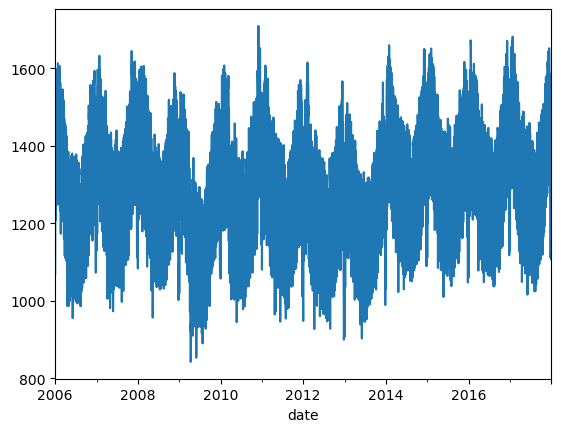

In [225]:
opsd_daily['Consumption'].plot()

<AxesSubplot:xlabel='date'>

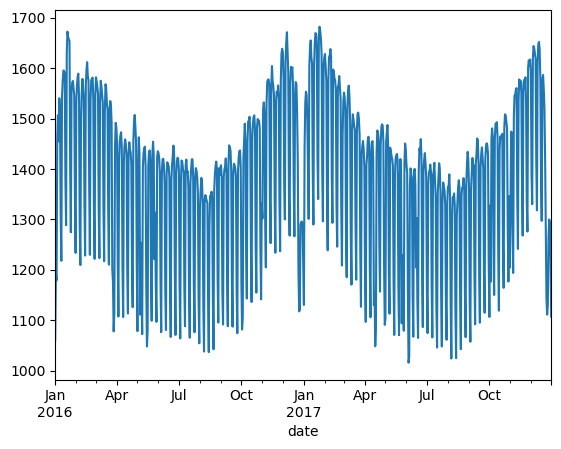

In [235]:
opsd_daily.loc['2016':'2017']['Consumption'].plot()

<AxesSubplot:xlabel='date'>

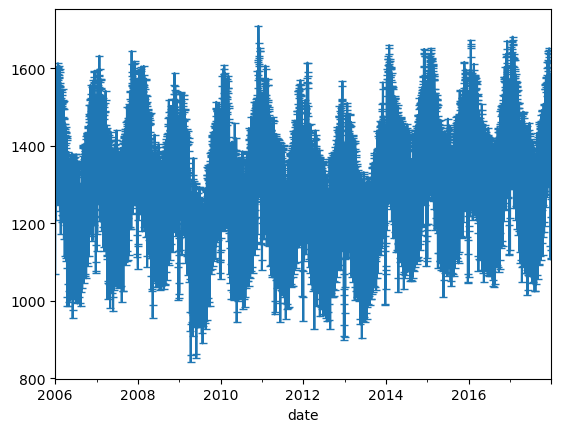

In [243]:
opsd_daily['Consumption'].plot(marker='_')

<AxesSubplot:xlabel='date'>

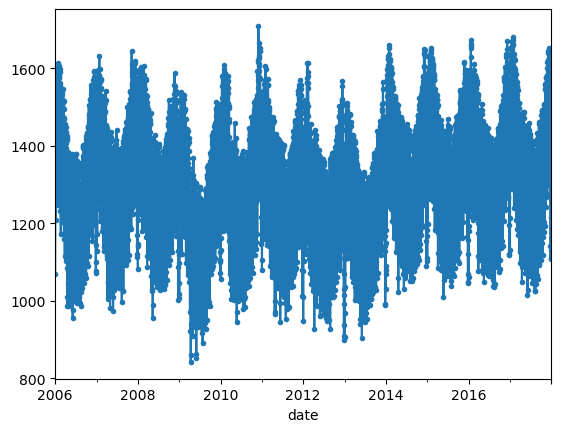

In [242]:
opsd_daily['Consumption'].plot(marker='.', linestyle = None)